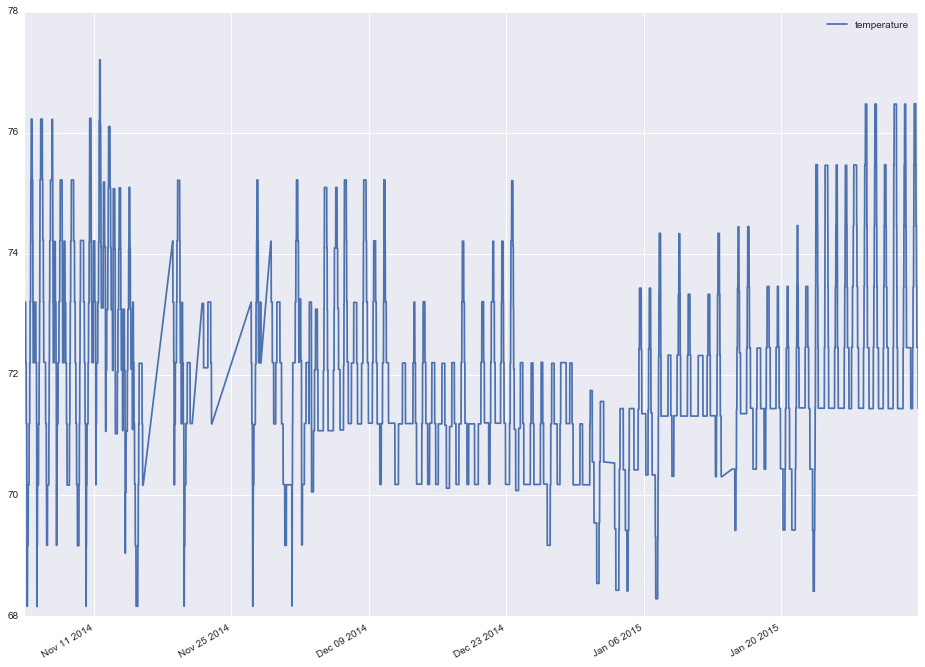

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pyflux as pf

from readers.mat_reader import MatReader

mat_reader = MatReader()
ts, xs, ys = mat_reader.read('ColdComplaintData/Training')
df = pd.DataFrame(ys, index=ts, columns=['temperature'])
df.plot(figsize=(16, 12))

model = pf.ARIMA(data=df,ar=4,ma=4,integ=0,target='temperature')

In [8]:
mat_reader = MatReader()
ts, xs, ys = mat_reader.read('ColdComplaintData/Testing')
print 

[datetime.datetime(2014, 11, 16, 0, 0), datetime.datetime(2014, 11, 16, 0, 5), datetime.datetime(2014, 11, 16, 0, 10), datetime.datetime(2014, 11, 16, 0, 15), datetime.datetime(2014, 11, 16, 0, 20), datetime.datetime(2014, 11, 16, 0, 25), datetime.datetime(2014, 11, 16, 0, 30), datetime.datetime(2014, 11, 16, 0, 35), datetime.datetime(2014, 11, 16, 0, 40), datetime.datetime(2014, 11, 16, 0, 45), datetime.datetime(2014, 11, 16, 0, 50), datetime.datetime(2014, 11, 16, 0, 55), datetime.datetime(2014, 11, 16, 1, 0), datetime.datetime(2014, 11, 16, 1, 5), datetime.datetime(2014, 11, 16, 1, 10), datetime.datetime(2014, 11, 16, 1, 15), datetime.datetime(2014, 11, 16, 1, 20), datetime.datetime(2014, 11, 16, 1, 25), datetime.datetime(2014, 11, 16, 1, 30), datetime.datetime(2014, 11, 16, 1, 35), datetime.datetime(2014, 11, 16, 1, 40), datetime.datetime(2014, 11, 16, 1, 45), datetime.datetime(2014, 11, 16, 1, 50), datetime.datetime(2014, 11, 16, 1, 55), datetime.datetime(2014, 11, 16, 2, 0), date

In [4]:
x = model.fit("MLE")
x.summary()

/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1687: RuntimeWarning: overflow encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:84: RuntimeWarning: overflow encountered in square
  return -x**2 / 2.0 - _norm_pdf_logC
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1687: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/s

ARIMA(4,0,4)                                                                                              
======================================================= ==================================================
Dependent Variable: temperature                         Method: MLE                                       
Start Date: 2015-01-29 00:20:00                         Log Likelihood: -12848.7052                       
End Date: 2015-01-26 23:55:00                           AIC: 25717.4104                                   
Number of observations: 23034                           BIC: 25797.8576                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 71.8489    0.4936     145.5599 0.0      (70.8815 | 72.8164)      
AR(1)                                

/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/numdifftools/extrapolation.py:431: RuntimeWarning: invalid value encountered in less_equal
  converged = err <= tol
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/numdifftools/limits.py:146: RuntimeWarning: invalid value encountered in less
  outliers = (((abs(der) < (a_median / trim_fact)) +
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/numdifftools/limits.py:147: RuntimeWarning: invalid value encountered in greater
  (abs(der) > (a_median * trim_fact))) * (a_median > 1e-8) +
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/numdifftools/limits.py:148: RuntimeWarning: invalid value encountered in less
  ((der < p25-1.5*iqr) + (p75+1.5*iqr < der)))


/home/federico/.virtualenvs/sdl/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
/home/federico/.virtualenvs/sdl/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


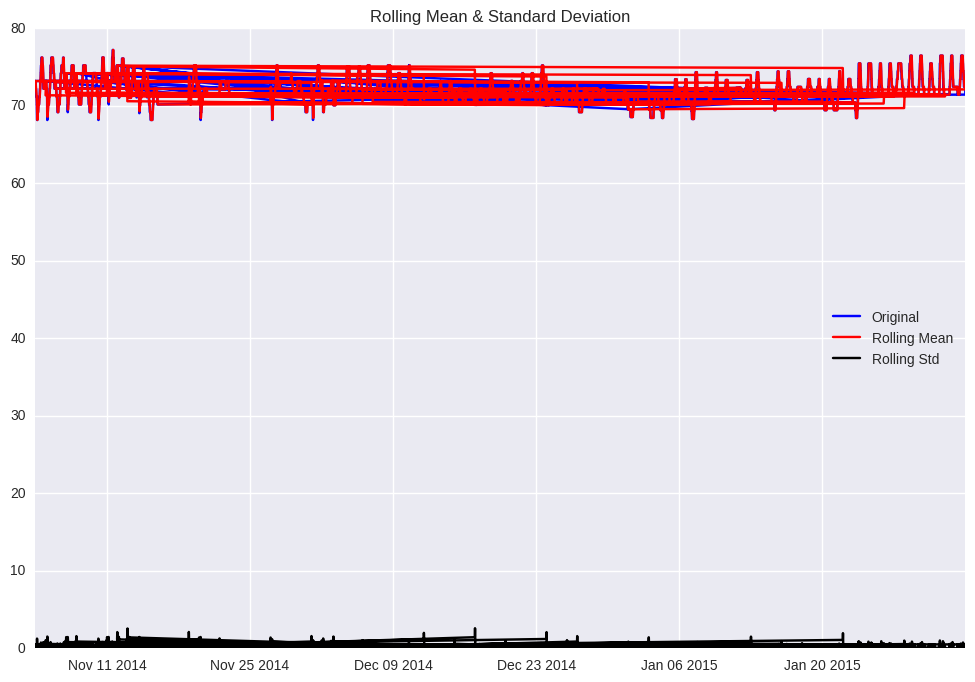

Results of Dickey-Fuller Test:


ValueError: too many values to unpack

In [5]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 
    
test_stationarity(df)

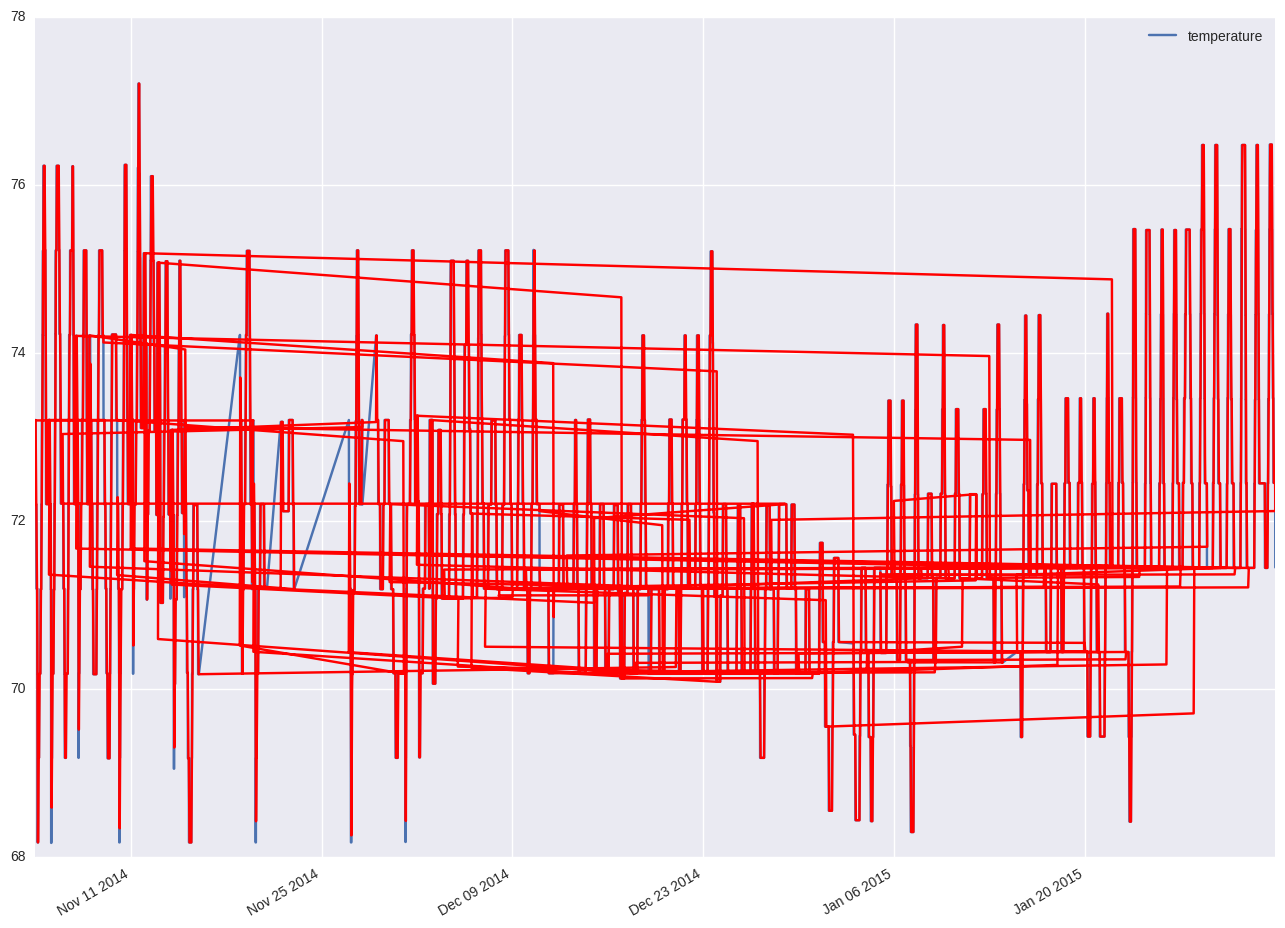

In [4]:
moving_avg = df.rolling(window=12,center=False).mean()
f = df.plot(figsize=(16, 12))
f.plot(moving_avg, color='red')

In [3]:
from statsmodels.tsa.stattools import adfuller

ImportError: No module named statsmodels.tsa.stattools

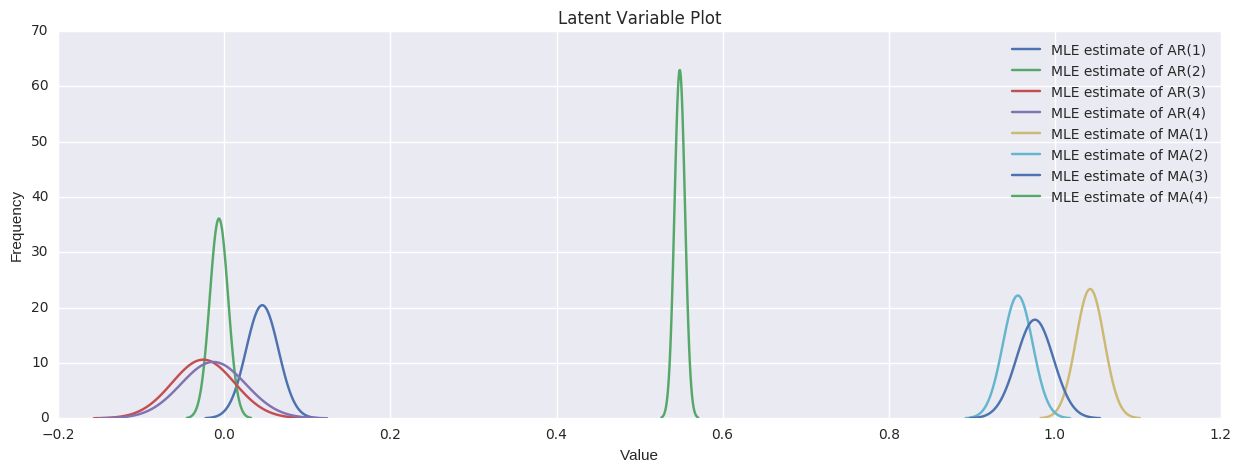

In [15]:
model.plot_z(indices=range(1,9))

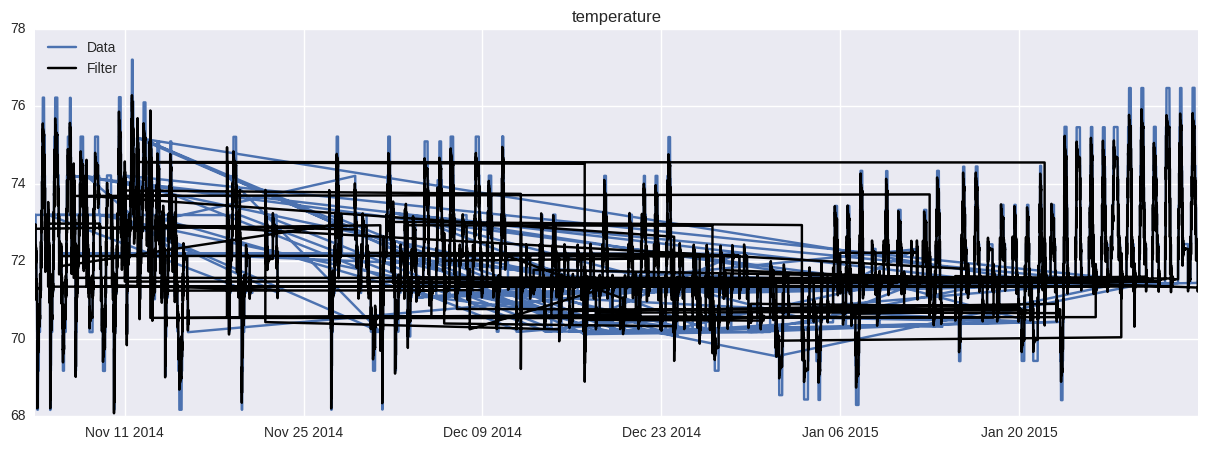

In [3]:
model.plot_fit(figsize=(15,5))

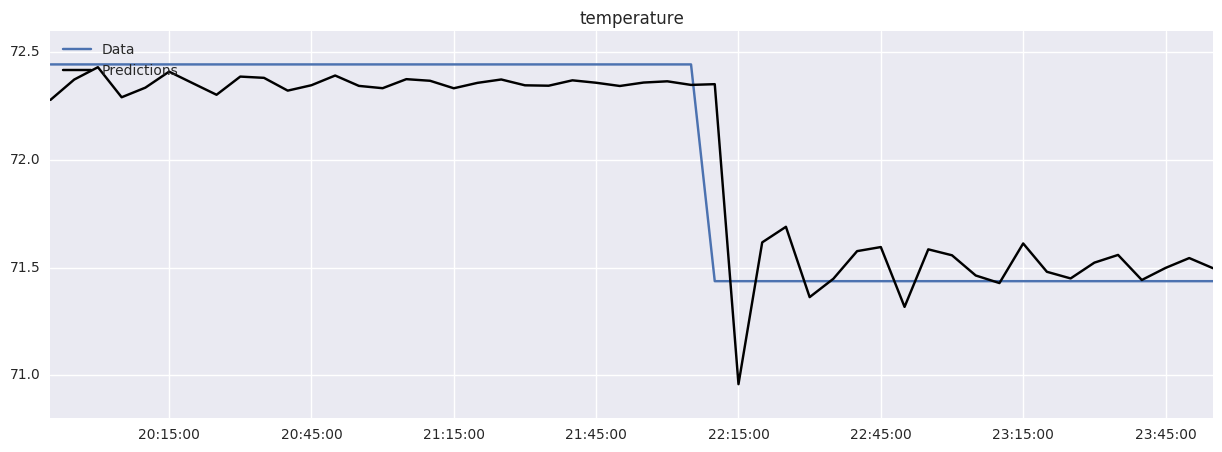

In [16]:
model.plot_predict_is(50,figsize=(15,5))

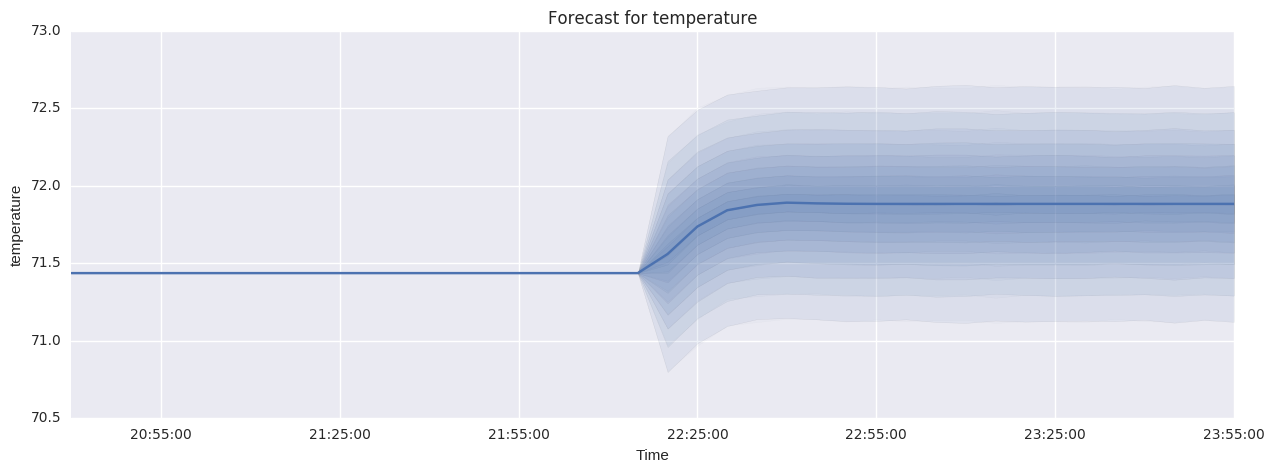

In [18]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))

In [19]:
model.predict(h=20)

,temperature
2015-01-27 22:20:00,71.560087
2015-01-27 22:25:00,71.737475
2015-01-27 22:30:00,71.842471
2015-01-27 22:35:00,71.876855
2015-01-27 22:40:00,71.891473
2015-01-27 22:45:00,71.886893
2015-01-27 22:50:00,71.884320
2015-01-27 22:55:00,71.883404
2015-01-27 23:00:00,71.883301
2015-01-27 23:05:00,71.883428
